In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [4]:
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<ipython-input-9-f0f3c37637f8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

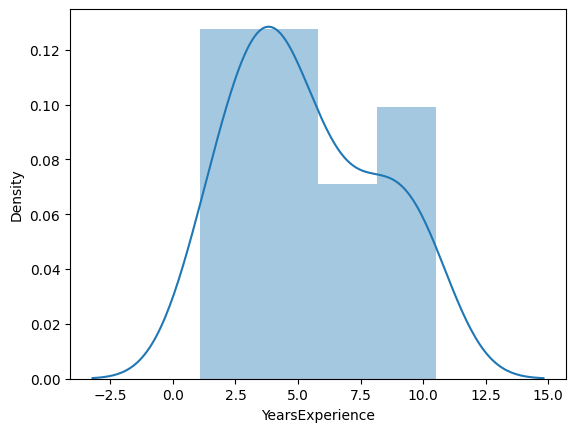

In [9]:
sns.distplot(data['YearsExperience'])


<ipython-input-10-10b07b01fa97>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

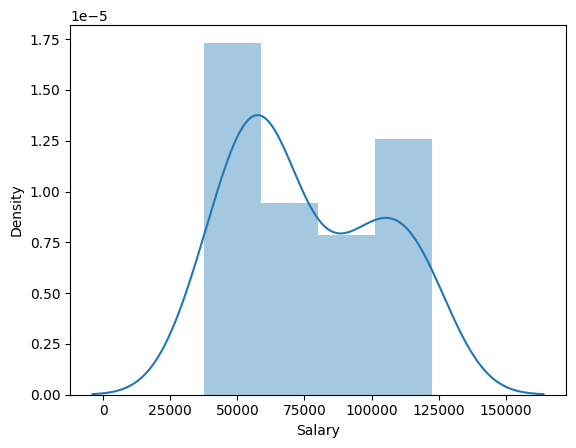

In [10]:
sns.distplot(data['Salary'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['YearsExperience']],
    data['Salary'],
    test_size=0.2,
    random_state=42)

In [12]:
X_train['log_YearsExperience'] = np.log(X_train['YearsExperience'])
X_test['log_YearsExperience'] = np.log(X_test['YearsExperience'])

In [13]:
model = LinearRegression()
model.fit(X_train[['log_YearsExperience']], y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test[['log_YearsExperience']])
y_pred

array([105690.62002247,  79261.67485733,  99496.13089578,  82345.44586818,
        62517.44576196,  68222.79629842])

In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 7714.64
MSE: 84567607.75
RMSE: 9196.06
R-squared: 0.83


In [19]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=data).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

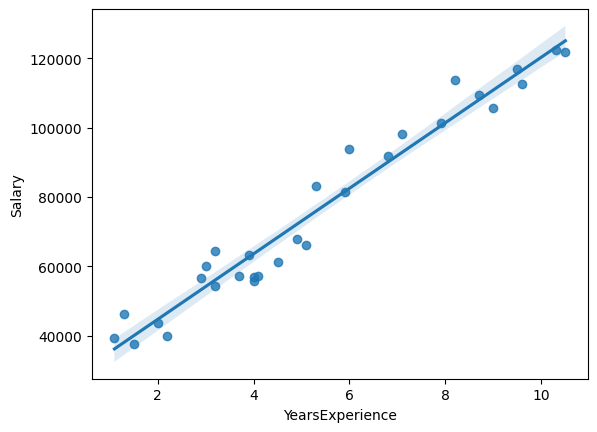

In [20]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [21]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [23]:
newdata=pd.Series([2,4,6,8,10])
newdata

0     2
1     4
2     6
3     8
4    10
dtype: int64

In [25]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
model.predict(data_pred)

0     44692.124842
1     63592.049484
2     82491.974127
3    101391.898770
4    120291.823413
dtype: float64